In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

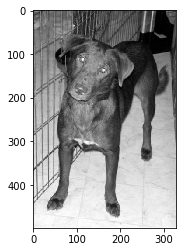

In [2]:
datadir='C:/Users/Raj/Desktop/New folder/training_set/training_set'
category=['dogs','cats']
for i in category:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break  

In [3]:
img_array

array([[227, 156, 121, ..., 109, 104, 103],
       [237, 158, 113, ...,  91,  87,  86],
       [233, 152, 107, ...,  61,  59,  60],
       ...,
       [255, 253, 249, ..., 238, 237, 237],
       [255, 254, 251, ..., 244, 243, 243],
       [255, 255, 253, ..., 249, 247, 248]], dtype=uint8)

In [4]:
img_array.shape

(499, 327)

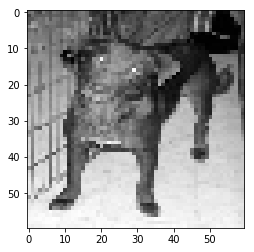

In [5]:
IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(datadir,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
len(training_data)

8005

In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
1
0
1
1


In [10]:
X=[]
y=[]

In [11]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [12]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X

array([[[[ 45],
         [ 49],
         [ 54],
         ...,
         [ 62],
         [ 67],
         [ 59]],

        [[ 46],
         [ 48],
         [ 53],
         ...,
         [ 56],
         [ 58],
         [ 59]],

        [[ 46],
         [ 48],
         [ 51],
         ...,
         [ 55],
         [ 58],
         [ 57]],

        ...,

        [[ 49],
         [ 49],
         [ 48],
         ...,
         [223],
         [220],
         [156]],

        [[ 49],
         [ 49],
         [ 49],
         ...,
         [189],
         [186],
         [209]],

        [[ 42],
         [ 49],
         [ 49],
         ...,
         [145],
         [194],
         [200]]],


       [[[ 39],
         [211],
         [215],
         ...,
         [194],
         [188],
         [180]],

        [[111],
         [190],
         [231],
         ...,
         [205],
         [198],
         [188]],

        [[155],
         [174],
         [216],
         ...,
         [208],
         [

In [13]:
import pickle
pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [14]:
pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()